# Ανάλυση και Επεξεργασία Γεωχωρικών Δεδομένων

## *Άσκηση 2: Γεωχωρικές Υπηρεσίες και Διαδικτυακές Εφαρμογές*

- Ονομ/νυμο: Χρήστος Νίκου
- AM: 03400146
- Ιδιότητα: Μεταπτυχιακός φοιτητής Επιστήμης Δεδομένων και Μηχανικής Μάθησης (ΕΔΕΜΜ)
- Ηλεκτρονική Διεύθυνση: christosnikou@mail.ntua.gr / chrisnick92@gmail.com


# Table of Contents
- [Introduction](#intro)
    - [1.1 Short description](#intro11)
    - [1.2 Installation of modules/libraries](#intro12)

- [Tasks](#tasks)
    - [Task 1](#task1) *Data Gathering and Data Description*
    - [Task 2](#task21) *Kastoria*
      - [2.1](#task211) *Kastoria RGB Vizualizations*
      - [2.2](#task212) *Clipping the Images*
      - [2.3](#task213) *NDVI Vizualizations*
      - [2.4](#task214) *Time series of the spectral indices*
      - [2.5](#task25) *Meteorological Analysis - Kastoria*
    
    - [Task 3](#task3) *Geospatial queries*
      - [3.1](#task31) *Downloading the data from WebServices*
      - [3.2](#task32) *Performing geospatial queries*
        - [3.2.1](#task321) *Query 1: Administrative regions of Greece and Airports*
        - [3.2.2](#task322) *Query 2: Settlements of Greece within 1km near some airport*
        - [3.2.3](#task323) *Query 3: Transportation in Attica*
        - [3.2.4](#task324) *Query 4: Administrative regions of Greece and Coastlines*
        - [3.2.5](#task325) *Query 5: Administrative regions of Greece and Railroads*
        - [3.2.6](#task326) *Query 6: Which rivers flow by the most European Countries?*
        - [3.2.7](#task327) *Query 7: European countries and Rivers*
      - [3.3](#task33) *Geospatial Analysis on Belgium*
        - [3.3.1](#task331) *Corine Land Cover - 2018* 
        - [3.3.2](#task332) *Meteorological Analysis - Brussels*
        - [3.3.3](#task333) *Meteorological Comparison Brussels - Athens*
    - [Task 4](#task4) *Interactive Maps*
       - [4.1](#task41) *An interactive map for Greece*
       - [4.2](#task42) *Corine Land Cover Interactive map*

# 1. Introduction <a name="intro"></a>

## 1.1 Short description <a name="intro11"></a>

The goal of this second Lab is to gain some familiarity with basic Python libraries which are used for Geospatial data manimulation and visualizations. Some of the most important libraries that we use throughout this notebook are the following:

- *rasterio: Reading and manipulating raster data.*
- *geopandas/pandas: Vizualizing vector data & making geospatial queries.*
- *OWSLib: Downloading data from WebServices (WMS, WFS, etc.).*
- *Leafmap/Folium: Creating Intervactive Maps using Vector & Raster data*.

One of the most challenging tasks of this Lab is to take advantage of the huge amount of geospatial data being out there and combine them efficiently in order to to exctract valuable geospatial-related information. The key lies on how we can use the above libraries efficiently in order to get the data under Python's environment. Once we achieve this, the highly - leveled structure of Python allows us to manipulate the data efficiently in a very elegant way.


## 1.2 Installation of modules/libraries <a name="intro12"></a>

Below we install all the necessary packages and modules that we are going to use throughout this notebook.

In [1]:
!pip install rasterio
!pip install owslib
!pip install requests
!pip install contextily
!pip install pandas fiona shapely pyproj rtree --upgrade
!pip install geopandas --upgrade
!pip install folium --upgrade
!pip install matplotlib mapclassif
!pip install leafmap
!pip install fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 217 kB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 45.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 5.1 MB/s 
     |████████████████████████████████| 1.0 MB 56.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-pyth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirement
!apt install python3-rtree 
# Install Geopandas
#!pip install git+git://github.com/geopandas/geopandas.git
!pip install geopandas==0.10.0
# Install descartes - Geopandas requirement
!pip install descartes 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 https://cloud.r-project.

In [1]:
import os 

#owslib
from owslib.wms import WebMapService
from owslib.wfs import WebFeatureService
from branca.element import Figure

#matplotlib-pandas-geopandas etc
from matplotlib.colors import ListedColormap, LinearSegmentedColormap # For customized cmaps
from shapely.geometry import Point, MultiPoint
import contextily as cx
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.style
import seaborn as sns
import pandas as pd
import numpy as np
import leafmap
import imageio
import folium

from IPython.display import Image
from requests import Request
import geojson
from pyproj import CRS

#rasterio
import rasterio
import fiona
import rasterio.features
import rasterio.warp
import rasterio.mask
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling

# 2. Tasks <a name="tasks"></a>

## Task 1 - *Data Gathering and Data Description* <a name="task1"></a>  

>*Choose an area of interest and search for raster, vector and data series of this area. Gather your data by using at least two different sources as well as the WFS services.*

As we stated before, one of the main goals of this Lab is to gather and combine efficiently the various geospatial information being on the web. In this section we describe all the data that we used throughout this notebook. The references in this section are also cited in the main body of the notebook. This part serves as a compacted reference point of the sources and the procedure that we used to gather our data.

The data focus on multiple regions in Europe. Therefore, we have more than one areas of interest. The reason for this is because during the development of the notebook some WMS/WFS requests for the data about Greece's Land use were unable to execute.

- The first area of interest is Kastoria. The link [https://pithos.okeanos.grnet.gr/public/fBSNLJeNxerluMj2MVDqF](https://pithos.okeanos.grnet.gr/public/fBSNLJeNxerluMj2MVDqF) provides raster data for region of Kastoria in a *tif* format. The size of the data is about 3GB and its the only dataset that is stored locally in the computer machine were this notebook was developed. The data consists of 24 Landsat images with the following 10 bands: 1) Blue, 2) Green, 3) Red, 4) NIR, 5) SWIR1, 6) SWIR2, 7) NDVI, 8) MSAVI, 9) NDWI, 10) NDBI. The first image is on date 2016/01/25 and the last on 2016/12/30.

- [https://geojson.io/](https://geojson.io/) provides an easy way of extracting vector data in the form of GeoJSON files. We use the vector data obtained from *geojson.io* to clip the images of Kastoria in subsection 2.2.

- From the meteorological portal of Nasa [https://power.larc.nasa.gov/data-access-viewer/](https://power.larc.nasa.gov/data-access-viewer/) we gather all of the meteorological data that used in subsections 2.5, 3.3.2 and 3.3.3.

- We make extensive use of the data provided from [https://geodata.gov.gr/](https://geodata.gov.gr/). Most of the geospatial queries in section 3 are about Greece. We use the WFS services of *geodata.gov.gr* to obtain vector data for the administrative region boundaries, airport locations, lakes, national parks etc.

- Another useful source of data obtain from the use of the WebServices is the search engine provided by [https://www.geoseer.net/](https://www.geoseer.net/). In particular, we gather the following WMS/WFS:

  - The WMS from [https://www.geoseer.net/rl.php?ql=4b4a6ba584ec26c2&p=1&q=landsat%20europe#](https://www.geoseer.net/rl.php?ql=4b4a6ba584ec26c2&p=1&q=landsat%20europe#) for a nice RGB image of Europe from Landsat satellite.
  - The WFS from [https://www.geoseer.net/rl.php?ql=0e305deee537335b&p=6&q=corine%20land%20cover#](https://www.geoseer.net/rl.php?ql=0e305deee537335b&p=6&q=corine%20land%20cover#) for the Corine Land Cover of Belgium for the year 2018.
  - The WFS from [https://www.geoseer.net/rl.php?ql=71eea20d99580c29&p=1&q=european%20countries](https://www.geoseer.net/rl.php?ql=71eea20d99580c29&p=1&q=european%20countries) for the vector data consisting of the European countries.
  - The WFS from [https://www.geoseer.net/rl.php?ql=984cb6cfa675d6f8&p=1&q=rivers%20europe](https://www.geoseer.net/rl.php?ql=984cb6cfa675d6f8&p=1&q=rivers%20europe) for the vector data consisting of the European rivers used in subsection 3.2.7.
  - The WMS from [https://www.geoseer.net/rl.php?ql=0fdcc2c406c9c7e2&p=1&q=corine%20land%20cover](https://www.geoseer.net/rl.php?ql=0fdcc2c406c9c7e2&p=1&q=corine%20land%20cover) for the Corine Land Cover of Italy for the year 2018 used in section 4 for the interactive maps. 


## Task 2 - *Kastoria*<a name="task21"></a>  

>*Read and display your raster data. Visualize certain spectral bands and certain spectral indices (e.g NDVI, EVI, NDWI, etc). For your area of interest, calculate the mean value for the spectral indices of your preference for every available date and create time series graphs for these indices.*

At this point we download into our local disk the data from Sentinel-2 for the region of Kastoria from the following [link](https://pithos.okeanos.grnet.gr/public/fBSNLJeNxerluMj2MVDqF). The data comes with a pdf file containing information about the data. The tif file containes 24 images of the region of Kastoria between 2016-01-25 and 2016-12-30. Each image contains the following bands: *1) Blue, 2) Green, 3) Red, 4) NIR, 5) SWIR1, 6), SWIR2, 7) NDVI, 8) MSAVI, 9) NDWI, 10) NDBI*.  Below we read the tif file with rasterio and we display some basic information about the data.

In [2]:
path = '/content/drive/MyDrive/ColabNotebooks/Geospatial' # path of kastoria.tif

kastoria = rasterio.open(os.path.join(path, 'Kastoria.tif'))

In [3]:
print('The type of the object is', type(kastoria))
print('The number of bands is equal to ', kastoria.count)
print(f'The size of the image is {kastoria.width}x{kastoria.height}')
print(f"The bounds of the image are {kastoria.bounds}")
print(f"The coordinate system is {kastoria.crs}")

The type of the object is <class 'rasterio.io.DatasetReader'>
The number of bands is equal to  240
The size of the image is 2281x2017
The bounds of the image are BoundingBox(left=509220.0, bottom=4472900.0, right=532030.0, top=4493070.0)
The coordinate system is EPSG:32634


### 2.1 *Kastoria RGB Vizualizations* <a name="task211"></a>

>*For the time series of Kastoria data, plot the RGB images for a certain date.*

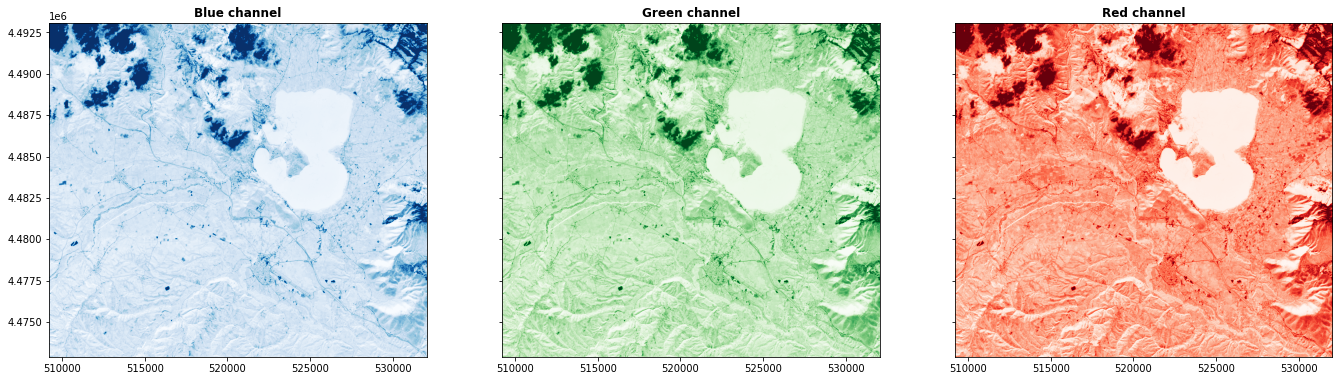

In [4]:
# Blue, Green, Red channels

fig, (axb, axg, axr) = plt.subplots(1,3, figsize = (23,15), sharey = True)

sns.set_style("dark")
show((kastoria,1), ax = axb, cmap = 'Blues', title = 'Blue channel')
show((kastoria,2), ax = axg, cmap = 'Greens', title = 'Green channel')
show((kastoria, 3), ax = axr, cmap = 'Reds', title = 'Red channel')
plt.show()

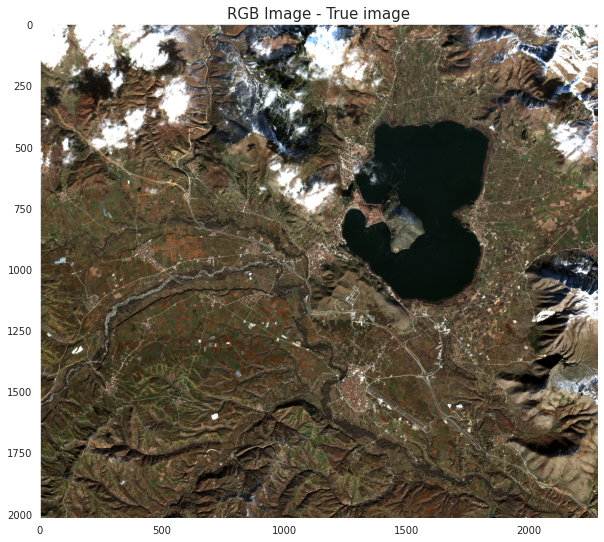

In [5]:
# RGB Image
def normalize(band):
  return (band - band.min())/(band.max() - band.min())

red_norm = normalize(kastoria.read(3))
green_norm = normalize(kastoria.read(2))
blue_norm = normalize(kastoria.read(1))

rgb = np.dstack ((red_norm, green_norm, blue_norm))

fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(rgb)
ax.set_title('RGB Image - True image', fontsize = 15)
plt.show()

### 2.2 *Clipping the Images* <a name="task212"></a>
> *Clip the image of Kastoria using rasterio.mask and keep the image that corresponds only to the your area of interest.*

At this point, using [geojson.io](https://geojson.io/#map=13/40.5441/21.2790) we draw a polygon which is contained in our initial Image of Kastoria. From geojson we download all the necessary shape files of the polygon and we store in a file called *Polygon*. Below we load the shp file and store it in a variable named *shape_file*.

In [6]:
poly_path = os.path.join(path, 'Lab2', 'polygon')
shape_file = gpd.read_file(os.path.join(poly_path, 'POLYGON.shp'))

Below we can see the projected coordinate system of the shape file and the raster data of Kastoria. In order to clip the image using the Polygon we must convert both in the same coordinate projected system.

In [7]:
# Check coordinate reference system (CRS) of both datasets
print('Shape file Projection: ', shape_file.crs)
print('kastoria file Projection: ', kastoria.crs)

Shape file Projection:  epsg:4326
kastoria file Projection:  EPSG:32634


Below we convert the Image of Kastoria to the EPSG:32634 coordinate system and we save the new raster data under the name *transformed_kastoria.tif*.

In [8]:
# Transform projection of imagery to specific coordinate system

# Specify output projection system

# Takes some time ~ 20min

dst_crs = shape_file.crs

kastoria_path = os.path.join(path, 'Kastoria.tif')
transformed_kastoria_path = os.path.join(path, 'transformed_kastoria.tif')

with rasterio.open(kastoria_path) as imagery:
    transform, width, height = calculate_default_transform(imagery.crs, dst_crs, imagery.width, imagery.height, *imagery.bounds)
    kwargs = imagery.meta.copy()
    kwargs.update({'crs': dst_crs, 'transform': transform, 'width': width, 'height': height})
    with rasterio.open(transformed_kastoria_path, 'w', **kwargs) as dst:
        for i in range(1, imagery.count + 1):
            reproject(
                source=rasterio.band(imagery, i),
                destination=rasterio.band(dst, i),
                src_transform=imagery.transform,
                src_crs=imagery.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

For convenience, we define a utility function to plot the RGB images of our data.

In [9]:
# A small function to plot RGB image

def rgb_array(raster_data, rgb_idx = [3,2,1]):
  img_red = normalize(raster_data.read(rgb_idx[0]))
  img_green = normalize(raster_data.read(rgb_idx[1]))
  img_blue = normalize(raster_data.read(rgb_idx[2]))

  return np.dstack((img_red, img_green, img_blue))

Below we can see the original image and the transformed image for a certain date.

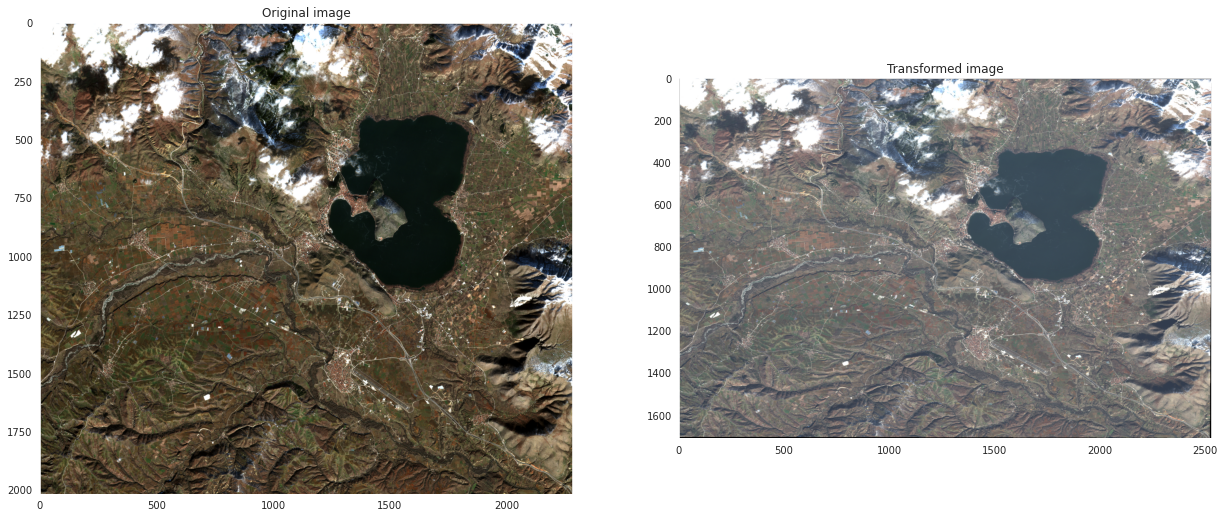

In [10]:
# Compare original image and transformed image

kastoria_tr = rasterio.open(os.path.join(path,'transformed_kastoria.tif'))

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (21,15))

ax1.imshow(rgb_array(kastoria))
ax1.set_title('Original image')

ax2.imshow(rgb_array(kastoria_tr))
ax2.set_title('Transformed image')
plt.show()

In [11]:
print('The projection system of the transformed image is', kastoria_tr.crs)

The projection system of the transformed image is EPSG:4326


In [12]:
# Clipping the image

# Read Shape file
with fiona.open(os.path.join(poly_path, 'POLYGON.shp'), "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

# read imagery file
with rasterio.open(os.path.join(path,'transformed_kastoria.tif')) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

# Save clipped imagery
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open(os.path.join(path, 'clipped_kastoria.tif'), "w", **out_meta) as dest:
    dest.write(out_image)

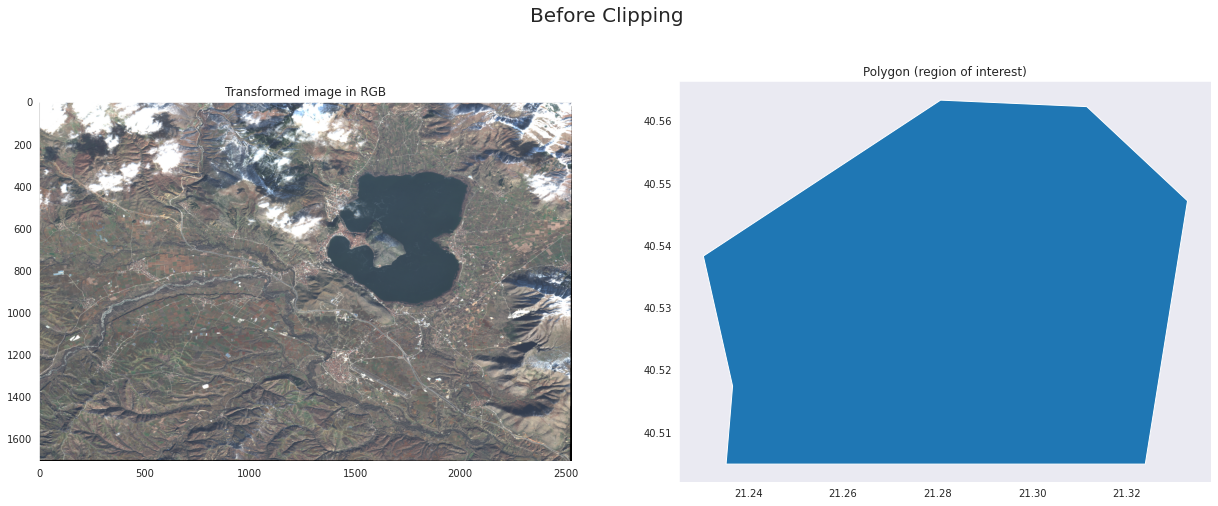

In [13]:
clipped_kastoria = rasterio.open(os.path.join(path, 'clipped_kastoria.tif'))

sns.set_style("dark")
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (21,8))

ax1.imshow(rgb_array(kastoria_tr))
ax1.set_title('Transformed image in RGB')
shape_file.plot(ax = ax2)
ax2.set_title('Polygon (region of interest)')

plt.suptitle('Before Clipping', fontsize = 20)
plt.show()

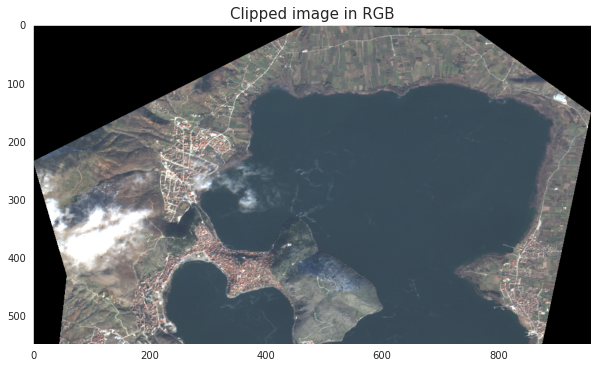

In [14]:
fig, ax = plt.subplots(figsize = (10,10))

ax.imshow(rgb_array(clipped_kastoria))
ax.set_title('Clipped image in RGB', fontsize = 15)
plt.show()

### 2.3 *NDVI Visualizations* <a name=task213></a>

>*For every available data of the Area of Interest (ROI) display the Images using the NDVI band and calculate the mean value of the NDVI on ROI.*

We first begin by displaying the NDVI for a specific date, i.e. 2016-01-25.

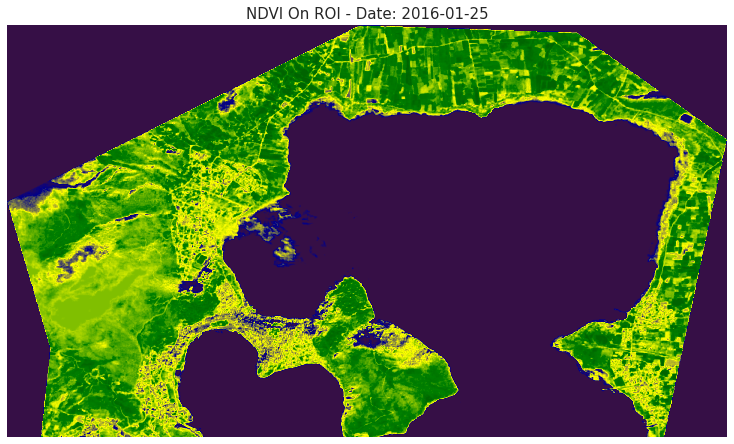

In [15]:
# NDVI visualization on ROI on 2016-01-25

from matplotlib.colors import ListedColormap, LinearSegmentedColormap # For customized cmaps
import matplotlib.colors

norm = matplotlib.colors.Normalize(-0.4,0.6)
colors = [[norm(-0.4), (0.215, 0.062, 0.278)],
          [norm(-0.2), "darkblue"],
          [norm( 0.0), "yellow"],
          [norm( 0.3), "green"],
          [norm(0.6), "darkgreen"]]

ndvi_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig, ax = plt.subplots(figsize = (10,10))
ndvi = clipped_kastoria.read(7)
ax.imshow(ndvi, vmin = ndvi.min(), vmax = ndvi.max(), cmap = ndvi_cmap,
          norm = norm)
ax.set_title('NDVI On ROI - Date: 2016-01-25', fontsize = 15)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

Below we store the bands corresponding to the NDVI for all images of our collection in a variable named `ndvi_all_dates`.

In [16]:
ndvi_all_dates = np.zeros((clipped_kastoria.height, clipped_kastoria.width, 24))

for day_idx in range(24):
  ndvi_all_dates[:,:, day_idx] = clipped_kastoria.read(7*(1+day_idx))

We create a utility function `index_gif` to generate a *gif* displaying the NDVI image for all the available dates.

In [17]:
def index_gif(ndvi_array, title, pngname, path, date_list,
              cmap, norm, filename = "TempFile", fps = 0.5):
  try:
    temp_path = os.path.join(path, filename)
    os.mkdir(temp_path)
    print("Directory" , filename ,  "Created ")

    vmin = ndvi_array.min()
    vmax = ndvi_array.max()
    for img_idx in range(ndvi_array.shape[2]):
      fig, ax = plt.subplots(figsize = (10,10))
      ax.imshow(ndvi_array[:,:, img_idx], vmin = vmin, vmax = vmax,
                cmap = cmap, norm = norm)
      ax.set_title(title + f" - " + date_list[img_idx], fontsize = 15)
      plt.gca().set_axis_off()
      plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                  hspace = 0, wspace = 0)
      plt.margins(0,0)
      plt.gca().xaxis.set_major_locator(plt.NullLocator())
      plt.gca().yaxis.set_major_locator(plt.NullLocator())
      plt.savefig(os.path.join(temp_path, pngname + date_list[img_idx]+".png"))
      plt.close()
    images = []
    for file_name in sorted(os.listdir(temp_path)):
        if file_name.endswith('.png'):
            file_path = os.path.join(temp_path, file_name)
            images.append(imageio.imread(file_path))
    imageio.mimsave(title +".gif", images, fps = fps)
  # Remove the specified  
  # file path
    for fname in os.listdir(temp_path):
      if fname.endswith(".png"):
        os.remove(os.path.join(temp_path, fname))
    try: 
        os.rmdir(temp_path) 
        print("% s removed successfully" % path) 
    except OSError as error: 
        print(error) 
        print("File path can not be removed") 
  except FileExistsError:
    print("Directory " , filename ,  " already exists")

In [18]:
date_list = ['2016-01-25', '2016-02-14', '2016-03-28', '2016-04-04', '2016-04-27', '2016-06-06', '2016-07-03',
             '2016-07-13', '2016-07-23', '2016-07-26', '2016-08-05','2016-08-12', '2016-08-15',
             '2016-08-22', '2016-09-04', '2016-09-14', '2016-10-01', '2016-10-14', '2016-11-13', '2016-12-03',
             '2016-12-10', '2016-12-20', '2016-12-23', '2016-12-30']

In [ ]:
index_gif(ndvi_all_dates,cmap = ndvi_cmap, norm=norm, title = 'Kastoria Lake - NDVI',
          pngname = 'ndvi', path = os.getcwd(), date_list = date_list)

Directory TempFile Created 
/content removed successfully


And the corresponding image for the Mean NDVI on ROI.

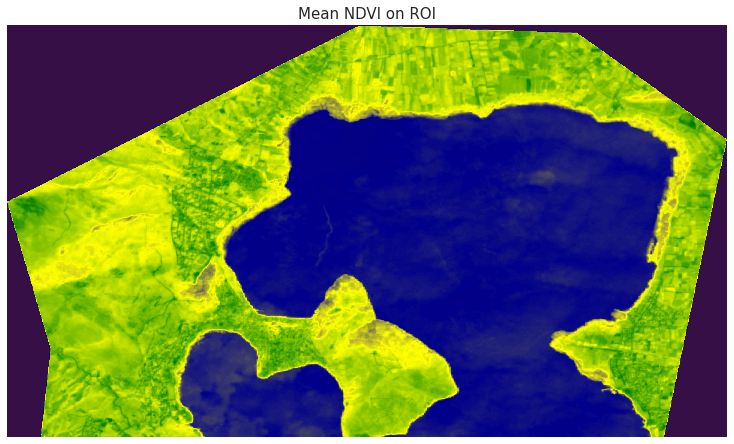

In [19]:
# Mean NDVI

fig, ax = plt.subplots(figsize = (10,10))
ndvi = clipped_kastoria.read(7)
ax.imshow(np.mean(ndvi_all_dates, axis = 2),
          cmap = ndvi_cmap, norm = norm)
ax.set_title('Mean NDVI on ROI', fontsize = 15)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

### 2.4 *Time Series of the Spectral Indices* <a name=task214></a>

>*Plot a time series of the spectral indices of your preference on ROI*

At this point we produce time series for the *NDVI, NDWI, NDBI* indices on the area of interest. In order to produce a time series chart we may use some kind of aggregation on our data or pick a specific point on the area and plot the series for this point. We use two different types of methods:

1. Calculate the mean value on the whole area and plot a time series for every available date.
2. We pick the pixel with highest mean values and we produce a time series for this point.

Below we define a dictionary that maps the names of the spectral indices to the number they correspond in our numpy array.

In [20]:
spectral_indices = {'NDVI': 7, 'NIR': 4, 'SWIR1': 5, 'SWIR2':6,
                    'MSAVI': 8, 'NDWI': 9, 'NDBI': 10}

We proceed by evaluating the mean value of the whole ROI for the three aforementioned indices. We construct a utility function named *mean_value_on_roi* to handle this computation. The function accepts the name of the index (`index`), the raster data, `raster_data`, the dictionary corresponding the indices the to number in the raster data (`index_dict`) and the total number of images (`num_images`).

In [21]:
def mean_value_on_roi(index, raster_data, index_dict, num_images = 24):
  means = []
  for i in range(num_images):
    means.append(raster_data.read((i+1)*index_dict[index]).mean())
  return means

In [22]:
mean_ndvis = mean_value_on_roi('NDVI', clipped_kastoria, spectral_indices)
mean_ndwis = mean_value_on_roi('NDWI', clipped_kastoria, spectral_indices)
mean_ndbis = mean_value_on_roi('NDBI', clipped_kastoria, spectral_indices)

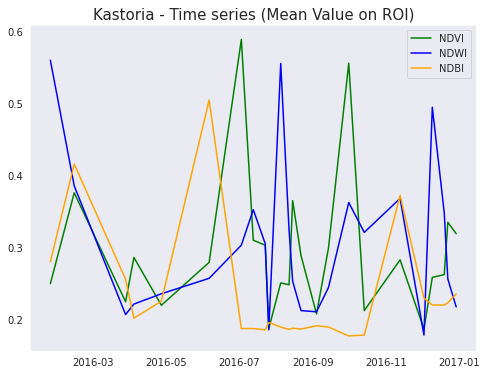

In [23]:
fig, ax = plt.subplots(figsize = (8,6))

timestamps = [pd.Timestamp(date) for date in date_list]

sns.set_style("dark")

ax.plot(timestamps, mean_ndvis, label = 'NDVI', color = 'green')
ax.plot(timestamps, mean_ndwis, label = 'NDWI', color = 'blue')
ax.plot(timestamps, mean_ndbis, label = 'NDBI', color = 'orange')
ax.legend()
ax.set_title("Kastoria - Time series (Mean Value on ROI)", fontsize = 15)
plt.show()

Now we find the pixels for the above three aforementioned indices with the highest mean value and we plot a time series for these three pixels.

In [24]:
def keep_only_one_band(index, raster_data, index_dict, num_images = 24):
  array = np.zeros((raster_data.height, raster_data.width, num_images))
  for day_idx in range(num_images):
    array[:,:, day_idx] = raster_data.read((day_idx+1)*index_dict[index])
  return array

In [25]:
ndvi = keep_only_one_band('NDVI', clipped_kastoria, spectral_indices)

In [26]:
ndvi = keep_only_one_band('NDVI', clipped_kastoria, spectral_indices)
ndwi = keep_only_one_band('NDWI', clipped_kastoria, spectral_indices)
ndbi = keep_only_one_band('NDBI', clipped_kastoria, spectral_indices)

print(f"- The pixels with the highest mean NDVI values are ", np.where(np.mean(ndvi, axis =2) == np.mean(ndvi, axis =2).max()))
print(f"- The pixels with the highest mean NDWI values are ", np.where(np.mean(ndwi, axis =2) == np.mean(ndwi, axis =2).max()))
print(f"- The pixels with the highest mean NDBI values are ", np.where(np.mean(ndbi, axis =2) == np.mean(ndbi, axis =2).max()))

- The pixels with the highest mean NDVI values are  (array([132, 132]), array([914, 915]))
- The pixels with the highest mean NDWI values are  (array([168]), array([954]))
- The pixels with the highest mean NDBI values are  (array([400]), array([305]))


- As we can see we have 2 pixels for the maximal value of the NDVI: (914, 132) & (915, 132).
- For the NDWI: (954, 168)
- For the NDBI: (305, 400).

Below we observe the location of these four points in an RGB image of ROI.

In [27]:
np.mean(ndwi, axis =2)[np.where(np.mean(ndwi, axis =2) == np.mean(ndwi, axis =2).max())]

array([0.77473993])

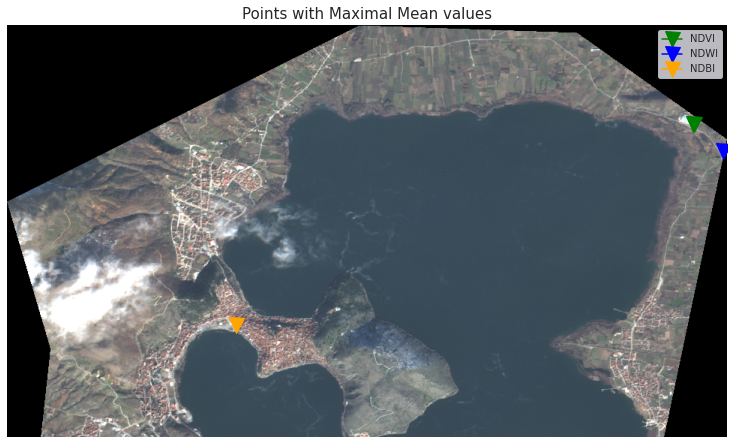

In [28]:
fig, ax = plt.subplots(figsize = (10,10))

ax.imshow(rgb_array(clipped_kastoria))
ax.set_title('Points with Maximal Mean values', fontsize = 15)
ax.plot(914, 132, marker = 'v', color = 'green', markersize = 15, label = 'NDVI')
ax.plot(915, 132, marker = 'v', color = 'green', markersize = 15)
ax.plot(954, 168, marker = 'v', color = 'blue', markersize = 15, label = 'NDWI')
ax.plot(305, 400, marker = 'v', color = 'orange', markersize = 15, label = 'NDBI')
ax.legend()
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

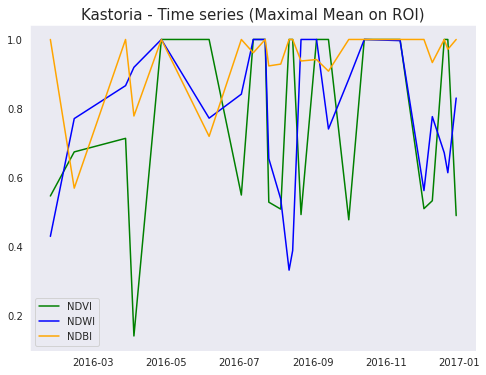

In [29]:
fig, ax = plt.subplots(figsize = (8,6))
sns.set_style("dark")

ax.plot(timestamps, ndvi[132, 914, :], label = 'NDVI', color = 'green')
ax.plot(timestamps, ndwi[168, 954, :], label = 'NDWI', color = 'blue')
ax.plot(timestamps, ndbi[400, 305, :], label = 'NDBI', color = 'orange')
ax.legend()
ax.set_title("Kastoria - Time series (Maximal Mean on ROI)", fontsize = 15)
plt.show()

### 2.5 *Meteorological Analysis - Kastoria* <a name=task25></a>

In this subsection we perform some basic analysis about the weather conditions in Kastoria. In detail we are interested in the following measurements for a specific point at the center of Kastoria.

- *All Sky Insolation Clearness Index:* A fraction representing clearness of the atmosphere; the all sky insolation that is transmitted through the atmosphere to strike the surface of the earth divided by the average of top of the atmosphere total solar irradiance incident.

- *All Sky Surface UVA Irradiance:* The ultraviolet A (UVA 315nm-400nm) irradiance under all sky conditions.

- *All Sky Surface UVB Irradiance*: The ultraviolet B (UVB 280nm-315nm) irradiance under all sky conditions.

- *Temperature at 2 Meters*: The average air (dry bulb) temperature at 2 meters above the surface of the earth.

- *Specific Humidity at 2 Meter*: The ratio of the mass of water vapor to the total mass of air at 2 meters (kg water/kg total air).

- *Relative Humidity at 2 Meters*: The ratio of actual partial pressure of water vapor to the partial pressure at saturation, expressed in percent.

- *Wind Speed at 10 Meters*: The average of wind speed at 10 meters above the surface of the earth.

The point that we choose for our analysis is located at the center of Kastoria and its lat,lon coordinates are (40.5213, 21.2618). Below we can see the point of interest at the center of Kastoria.

In [30]:
pt_lat, pt_long = 40.5213, 21.2618

rev = ~clipped_kastoria.transform 
print(f'The pixel corresponding to the point is', rev*(pt_long, pt_lat))

The pixel corresponding to the point is (294.735163502919, 395.28012340777786)


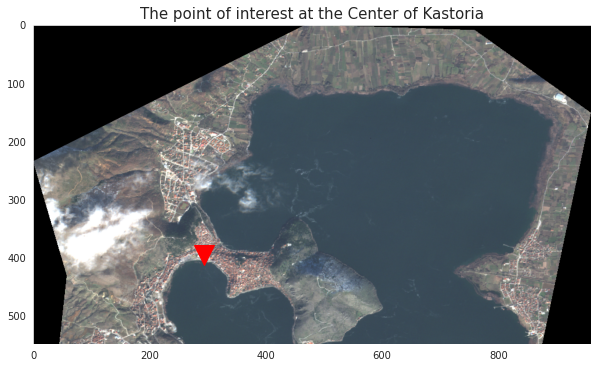

In [31]:
fig, ax = plt.subplots(figsize = (10,10))

ax.imshow(rgb_array(clipped_kastoria))
ax.set_title('The point of interest at the Center of Kastoria', fontsize = 15)
ax.plot(294, 395, marker = 'v', color = 'red', markersize = 20)
plt.show()

Now we collect meteorological measurements for this point from the portal of [NASA](https://power.larc.nasa). For better interpretation of the meteorological measurements we compare with the same measurements for point at the center of Athens.

In [32]:
athens_meteo = pd.read_csv('https://raw.githubusercontent.com/ChrisNick92/Geospatial-Data/main/Lab2/MeteorologicalData/athens.csv',
                             header = 15).rename(columns = {'ALLSKY_KT': 'Sky Clearness', 'ALLSKY_SFC_UVA': 'UVA Radiance Index',
                                                            'ALLSKY_SFC_UVB': 'UVB Radiance Index', 'T2M': 'Temperature',
                                                            'QV2M': 'Specific Humidity', 'WS10M': 'Wind Speed', 'RH2M': 'Relative Humidity'})
# Create a date column and covert to datetime
athens_meteo['date'] = pd.to_datetime(athens_meteo['YEAR'].astype('str') + '-' + athens_meteo['MO'].astype('str') + '-' + athens_meteo['DY'].astype('str'),
                                    format = "%Y-%m-%d")
athens_meteo.head()

YEAR  MO  DY  Sky Clearness  UVA Radiance Index  UVB Radiance Index  \
0  2021   1   1           0.69                5.87                0.06   
1  2021   1   2           0.35                3.70                0.04   
2  2021   1   3           0.52                4.93                0.05   
3  2021   1   4           0.28                3.18                0.04   
4  2021   1   5           0.63                5.74                0.06   

   Temperature  Specific Humidity  Wind Speed  Relative Humidity       date  
0        12.06               5.74        2.25              66.12 2021-01-01  
1        12.87               7.45        2.50              79.69 2021-01-02  
2        13.99               9.16        4.91              91.75 2021-01-03  
3        14.01               9.16        7.07              90.50 2021-01-04  
4        11.37               6.16        3.77              73.88 2021-01-05

In [33]:
kastoria_meteo = pd.read_csv('https://raw.githubusercontent.com/ChrisNick92/Geospatial-Data/main/Lab2/MeteorologicalData/kastoria.csv',
                             header = 15).rename(columns = {'ALLSKY_KT': 'Sky Clearness', 'ALLSKY_SFC_UVA': 'UVA Radiance Index',
                                                            'ALLSKY_SFC_UVB': 'UVB Radiance Index', 'T2M': 'Temperature',
                                                            'QV2M': 'Specific Humidity', 'WS10M': 'Wind Speed', 'RH2M': 'Relative Humidity'})
# Create a date column and covert to datetime
kastoria_meteo['date'] = pd.to_datetime(kastoria_meteo['YEAR'].astype('str') + '-' + kastoria_meteo['MO'].astype('str') + '-' + kastoria_meteo['DY'].astype('str'),
                                    format = "%Y-%m-%d")
kastoria_meteo.head()                         

YEAR  MO  DY  Sky Clearness  UVA Radiance Index  UVB Radiance Index  \
0  2021   1   1           0.71                5.11                0.04   
1  2021   1   2           0.55                4.32                0.04   
2  2021   1   3           0.55                4.43                0.04   
3  2021   1   4           0.16                1.62                0.02   
4  2021   1   5           0.65                4.91                0.05   

   Temperature  Relative Humidity  Specific Humidity  Wind Speed       date  
0         3.19              80.69               4.21        1.92 2021-01-01  
1         2.48              86.69               4.33        2.97 2021-01-02  
2         5.37              92.06               5.74        2.47 2021-01-03  
3         3.83              97.62               5.49        4.10 2021-01-04  
4         2.30              88.81               4.39        3.04 2021-01-05

In [34]:
kastoria_meteo['Place'] = 'Kastoria'
athens_meteo['Place'] = 'Athens'

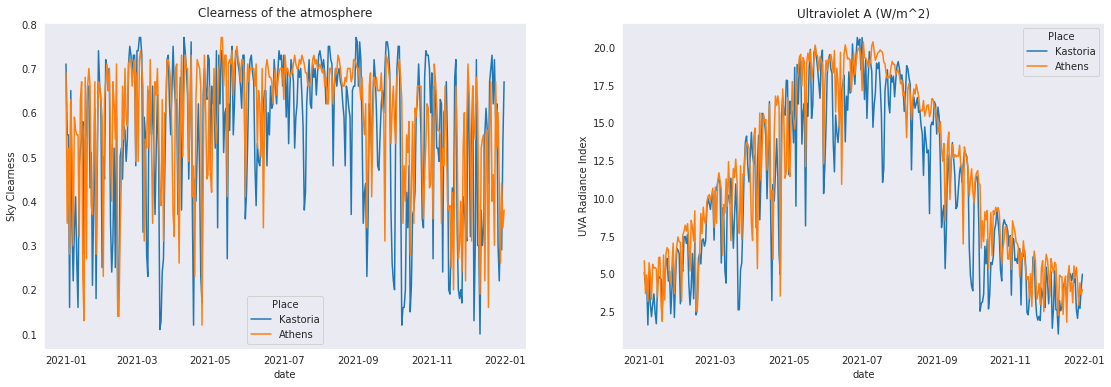

In [35]:
sns.set_style('dark')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19, 6))
sns.lineplot(x = 'date', y = 'Sky Clearness',
                     data = kastoria_meteo.append(athens_meteo, ignore_index=True), ax = ax[0],
             hue = 'Place').set(title =  'Clearness of the atmosphere')
sns.lineplot(x = 'date', y = 'UVA Radiance Index', hue = 'Place',
                     data = kastoria_meteo.append(athens_meteo, ignore_index=True), ax = ax[1]).set(title = 'Ultraviolet A (W/m^2)')
plt.show()

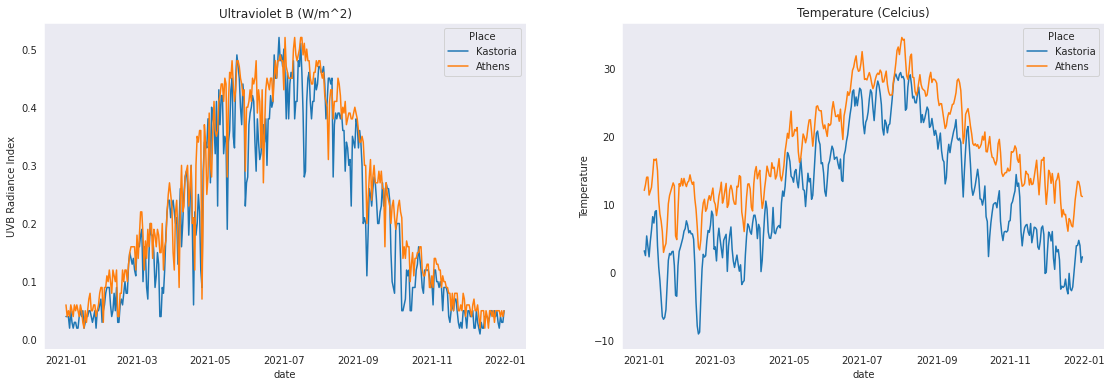

In [36]:
sns.set_style('dark')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19, 6))
sns.lineplot(x = 'date', y = 'UVB Radiance Index',
                     data = kastoria_meteo.append(athens_meteo, ignore_index=True), ax = ax[0],
             hue = 'Place').set(title =  'Ultraviolet B (W/m^2)')
sns.lineplot(x = 'date', y = 'Temperature',
                     data = kastoria_meteo.append(athens_meteo, ignore_index=True), ax = ax[1],
             hue = 'Place').set(title = 'Temperature (Celcius)')          
plt.show()

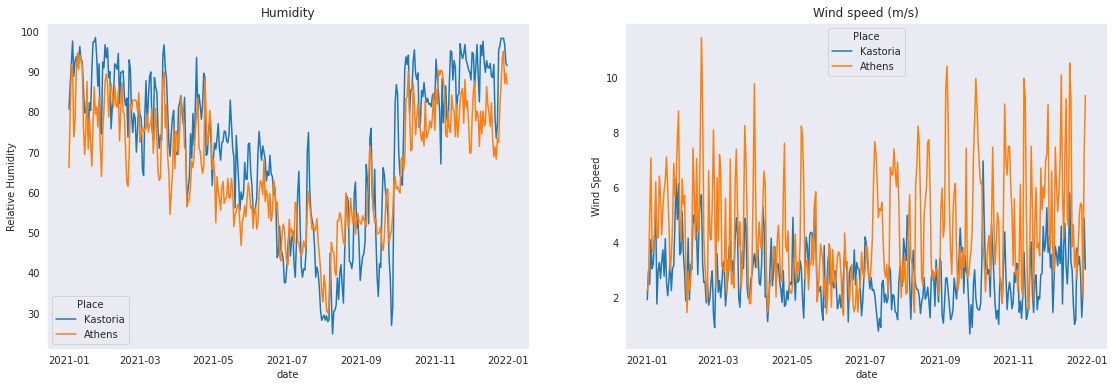

In [37]:
sns.set_style('dark')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19, 6))
sns.lineplot(x = 'date', y = 'Relative Humidity',
                     data = kastoria_meteo.append(athens_meteo, ignore_index=True), ax = ax[0],
             hue = 'Place').set(title =  'Humidity')
sns.lineplot(x = 'date', y = 'Wind Speed',
                     data = kastoria_meteo.append(athens_meteo, ignore_index=True), ax = ax[1],
             hue = 'Place').set(title = 'Wind speed (m/s)')            
plt.show()